Objective of the dataset:

This dataset contains all the incidents of crossing the border into the US as provided by the Bureau of Transportation Statistics, Govt. of the US. This dataset tells about the incoming counts into the US.

This can prove to be a vital dataset to predict the average incoming counts into the future seeing the current trend. A primary look tells us that 77% of the incidents marked in the dataset consisted of US-Canada border meaning Canadians have tended to come in more frequently into the US as compared to the Mexicans.

This data can also prove to useful to predict the daily or weekly or monthly or annual traffic that's going to accumulate on the borders so that the authorities can be aware of the number beforehand.

In [1]:
#Importing the library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime as dt

In [2]:
#Importing the dataset
data = pd.read_csv("C:\\Users\\MEHUL\\Downloads\\Border_Crossing_Entry_Data.csv\\Border_Crossing_Entry_Data.csv")
data.head()

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicle Passengers,1414
1,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicles,763
2,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Empty,412
3,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Full,122
4,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Trucks,545


In [3]:
#Splitting Year and Month
data['Date']=pd.to_datetime(data['Date'])
data['Year']=data['Date'].dt.year
data['Month']=data['Date'].dt.month
data.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Year,Month
0,Alcan,AK,3104,US-Canada Border,2020-02-01,Personal Vehicle Passengers,1414,2020,2
1,Alcan,AK,3104,US-Canada Border,2020-02-01,Personal Vehicles,763,2020,2
2,Alcan,AK,3104,US-Canada Border,2020-02-01,Truck Containers Empty,412,2020,2
3,Alcan,AK,3104,US-Canada Border,2020-02-01,Truck Containers Full,122,2020,2
4,Alcan,AK,3104,US-Canada Border,2020-02-01,Trucks,545,2020,2


In [4]:
#Checking the total number of values in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355511 entries, 0 to 355510
Data columns (total 9 columns):
Port Name    355511 non-null object
State        355511 non-null object
Port Code    355511 non-null int64
Border       355511 non-null object
Date         355511 non-null datetime64[ns]
Measure      355511 non-null object
Value        355511 non-null int64
Year         355511 non-null int64
Month        355511 non-null int64
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 24.4+ MB


In [5]:
data.isnull().sum()
#The below value suggest that there is no missing values in the dataset

Port Name    0
State        0
Port Code    0
Border       0
Date         0
Measure      0
Value        0
Year         0
Month        0
dtype: int64

In [6]:
data.describe()

,Port Code,Value,Year,Month
count,355511.000000,3.555110e+05,355511.000000,355511.000000
mean,2454.009921,2.844758e+04,2007.126362,6.456796
std,1201.900231,1.518807e+05,6.636064,3.455253
min,101.000000,0.000000e+00,1996.000000,1.000000
25%,2304.000000,0.000000e+00,2001.000000,3.000000
50%,3013.000000,1.000000e+02,2007.000000,6.000000
75%,3402.000000,2.597500e+03,2013.000000,9.000000
max,4105.000000,4.447374e+06,2020.000000,12.000000


In [7]:
#Total number of people that have entered the USA
data['Value'].sum()

10113428111

In [8]:
#Number of People that entered USA via Mexico border
Border_Incoming_People = data.groupby(by = 'Border').sum()['Value']
Border_Incoming_People['Total'] = Border_Incoming_People[0] +Border_Incoming_People[1]
print(str(round(Border_Incoming_People[0]/ Border_Incoming_People['Total']*100,2)), "%")

27.45 %


In [9]:
#Number of People that entered USA via Canada border
print(str(round(Border_Incoming_People[1]/ Border_Incoming_People['Total']*100,2)), "%")

72.55 %


Text(0.5, 1, 'Correlation Matrix')

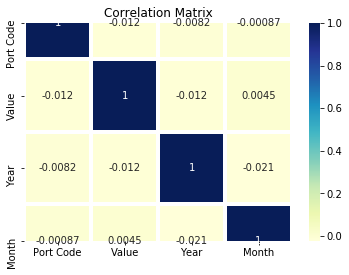

In [10]:
#Finding correlation between the dataset
data_corr = data.corr()
sns.heatmap(data_corr, annot =True, linewidths= 3, cmap="YlGnBu")
plt.title('Correlation Matrix')
#The below correlation suggest that the number of people entering in USA does not depend on any of the independent variable i.e. Month, Year and Port Code.

Text(0.5, 1.0, 'Number of people crossing the border year on year')

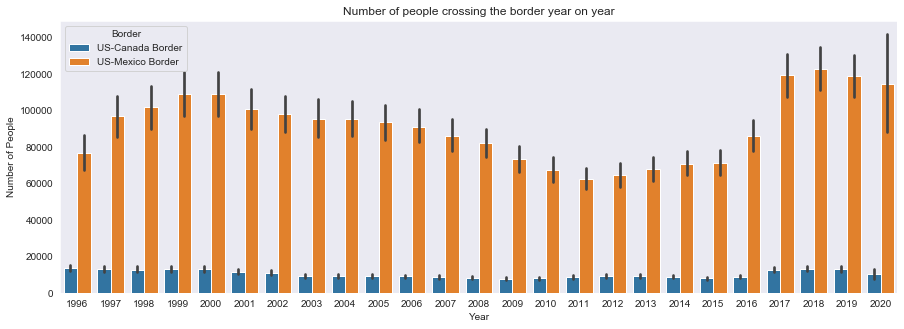

In [11]:
#Number of people crossing the border year on year
plt.figure(figsize=(15,5))
sns.set_style('dark')
sns.barplot(x='Year',y='Value',data=data, hue= 'Border')
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.title('Number of people crossing the border year on year')

Text(0.5, 1.0, 'Number of people crossing the border month on month')

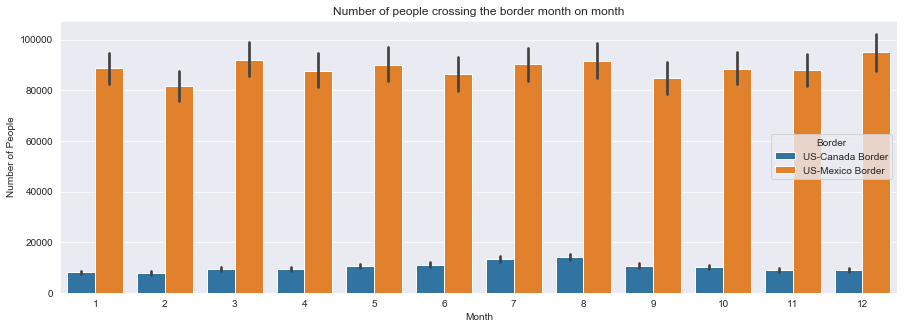

In [12]:
#Number of people crossing the border Month on Month
plt.figure(figsize=(15,5))
plt.grid()
sns.set_style('dark')
sns.barplot(x='Month',y='Value',data=data, hue= 'Border')
plt.xlabel('Month')
plt.ylabel('Number of People')
plt.title('Number of people crossing the border month on month')
#The below graph suggest that in the months of July and August, the number of incoming people are maximum.
#Hence, monitoring should be stricten during these months.

In [13]:
#Top 20 Busiest Port
port_sum=data.groupby(['Port Name','Border']).sum()['Value'].reset_index().sort_values('Value',ascending=False)
port_sum = port_sum.head(20).reset_index()
port_sum.drop('index', axis=1)


,Port Name,Border,Value
0,El Paso,US-Mexico Border,1186748989
1,San Ysidro,US-Mexico Border,1184198982
2,Laredo,US-Mexico Border,676914805
3,Hidalgo,US-Mexico Border,583725539
4,Buffalo-Niagara Falls,US-Canada Border,559736205
5,Calexico,US-Mexico Border,538455020
6,Brownsville,US-Mexico Border,533360410
7,Detroit,US-Canada Border,497457335
8,Otay Mesa,US-Mexico Border,471000461
9,Nogales,US-Mexico Border,414830531


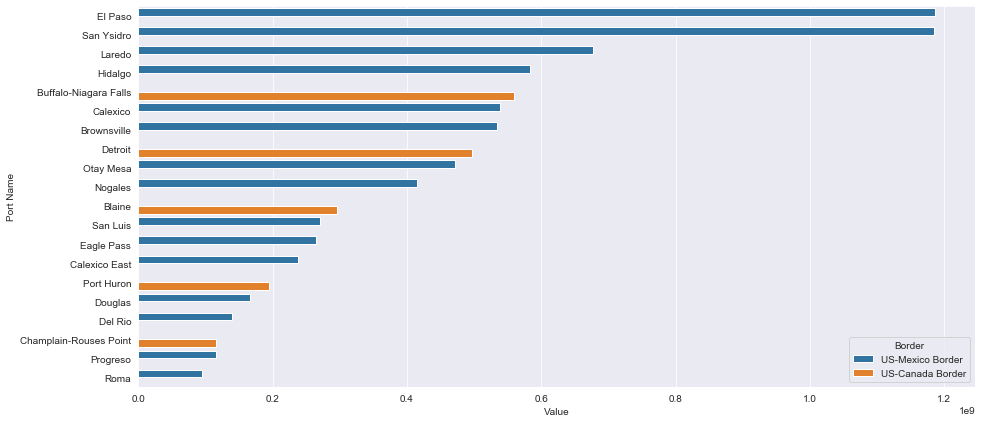

In [14]:
#Top 20 Busiest Port
plt.figure(figsize=(15,7))
plt.grid()
sns.set_style('dark')
sns.barplot(x='Value',y='Port Name',hue='Border',data=port_sum.head(20))

In [15]:
#Number of people entering the USA, year on year and state wise
state_wise = pd.pivot_table(data, index='State', values = 'Value', columns='Year', aggfunc = 'sum')
state_wise

Year,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
State,,,,,,,,,,,,,,,,,,,,,
AK,533846.0,549898.0,641446.0,594558.0,597226.0,571401.0,572053.0,580050.0,604488.0,598815.0,...,572395.0,598502.0,600360.0,614183.0,638128.0,695183.0,701630.0,760035.0,771540.0,12508.0
AZ,38038999.0,40510361.0,41441325.0,44309727.0,46455388.0,43736679.0,47879142.0,44387731.0,45409773.0,43389212.0,...,28001652.0,29550885.0,31832084.0,32237096.0,33496163.0,33808709.0,35837985.0,35337206.0,32998336.0,5480108.0
CA,53660517.0,114036240.0,122069944.0,127335362.0,128130552.0,122897000.0,122893606.0,125512610.0,122877609.0,121849249.0,...,88164655.0,90609720.0,93026139.0,97966432.0,105662282.0,106582454.0,108680219.0,111891049.0,111514531.0,17939167.0
ID,912301.0,917028.0,870206.0,919462.0,905838.0,877294.0,796523.0,724604.0,708615.0,743955.0,...,1042863.0,1029280.0,1062151.0,1078602.0,951761.0,909978.0,891609.0,897241.0,893860.0,104983.0
ME,14625254.0,14362472.0,13697562.0,13226099.0,13061076.0,11413326.0,10300604.0,10392682.0,11527988.0,11586257.0,...,8772871.0,8914016.0,8559379.0,8050813.0,6731140.0,6259613.0,6225073.0,5983719.0,5905831.0,746646.0
MI,50694957.0,43840023.0,47720668.0,48570140.0,51544853.0,40170653.0,35711575.0,32937524.0,32593006.0,32677938.0,...,24949949.0,25738262.0,26148885.0,25387578.0,24054694.0,23461564.0,23134767.0,23054786.0,23954524.0,3275657.0
MN,4489444.0,4232799.0,4541962.0,4716641.0,4815548.0,4464157.0,4200452.0,4367642.0,4593970.0,4401576.0,...,3953171.0,4056485.0,4021611.0,4002140.0,3787439.0,3642290.0,3660237.0,3637182.0,3591607.0,473309.0
MT,2546699.0,2604130.0,2563757.0,2853011.0,2430641.0,2255343.0,2203512.0,2143149.0,2235952.0,2319660.0,...,2298352.0,2457217.0,2515685.0,2519107.0,2253905.0,2187606.0,2169190.0,2102519.0,2098923.0,240317.0
ND,3055810.0,2804121.0,2833368.0,3170548.0,3275535.0,3114535.0,3186595.0,3085606.0,3183924.0,3184881.0,...,3523890.0,3855671.0,3763463.0,3753029.0,3285056.0,3071822.0,3164978.0,3157963.0,3080885.0,426942.0


Text(0.5, 1.0, 'Number of people crossing the border, state wise')

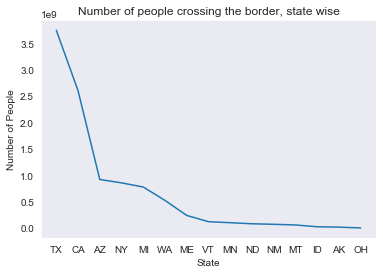

In [16]:
#Number of people entering the USA, state wise
state_wise = pd.pivot_table(data, index='State', values = 'Value',aggfunc = 'sum')
state_wise = state_wise.sort_values(by = 'Value', ascending=False)
plt.plot(state_wise)
plt.xlabel('State')
plt.ylabel('Number of People')
plt.title('Number of people crossing the border, state wise')
#Top 5 states with maximum incoming migrants are TX, CA, AZ, NY and MI.
#Monitoring of these states will help preventing the incoming people.

In [17]:
#Number of people entering the USA, year on year and state wise
pd.pivot_table(data, index='State', values = 'Value', columns='Year', aggfunc = 'sum')

Year,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
State,,,,,,,,,,,,,,,,,,,,,
AK,533846.0,549898.0,641446.0,594558.0,597226.0,571401.0,572053.0,580050.0,604488.0,598815.0,...,572395.0,598502.0,600360.0,614183.0,638128.0,695183.0,701630.0,760035.0,771540.0,12508.0
AZ,38038999.0,40510361.0,41441325.0,44309727.0,46455388.0,43736679.0,47879142.0,44387731.0,45409773.0,43389212.0,...,28001652.0,29550885.0,31832084.0,32237096.0,33496163.0,33808709.0,35837985.0,35337206.0,32998336.0,5480108.0
CA,53660517.0,114036240.0,122069944.0,127335362.0,128130552.0,122897000.0,122893606.0,125512610.0,122877609.0,121849249.0,...,88164655.0,90609720.0,93026139.0,97966432.0,105662282.0,106582454.0,108680219.0,111891049.0,111514531.0,17939167.0
ID,912301.0,917028.0,870206.0,919462.0,905838.0,877294.0,796523.0,724604.0,708615.0,743955.0,...,1042863.0,1029280.0,1062151.0,1078602.0,951761.0,909978.0,891609.0,897241.0,893860.0,104983.0
ME,14625254.0,14362472.0,13697562.0,13226099.0,13061076.0,11413326.0,10300604.0,10392682.0,11527988.0,11586257.0,...,8772871.0,8914016.0,8559379.0,8050813.0,6731140.0,6259613.0,6225073.0,5983719.0,5905831.0,746646.0
MI,50694957.0,43840023.0,47720668.0,48570140.0,51544853.0,40170653.0,35711575.0,32937524.0,32593006.0,32677938.0,...,24949949.0,25738262.0,26148885.0,25387578.0,24054694.0,23461564.0,23134767.0,23054786.0,23954524.0,3275657.0
MN,4489444.0,4232799.0,4541962.0,4716641.0,4815548.0,4464157.0,4200452.0,4367642.0,4593970.0,4401576.0,...,3953171.0,4056485.0,4021611.0,4002140.0,3787439.0,3642290.0,3660237.0,3637182.0,3591607.0,473309.0
MT,2546699.0,2604130.0,2563757.0,2853011.0,2430641.0,2255343.0,2203512.0,2143149.0,2235952.0,2319660.0,...,2298352.0,2457217.0,2515685.0,2519107.0,2253905.0,2187606.0,2169190.0,2102519.0,2098923.0,240317.0
ND,3055810.0,2804121.0,2833368.0,3170548.0,3275535.0,3114535.0,3186595.0,3085606.0,3183924.0,3184881.0,...,3523890.0,3855671.0,3763463.0,3753029.0,3285056.0,3071822.0,3164978.0,3157963.0,3080885.0,426942.0


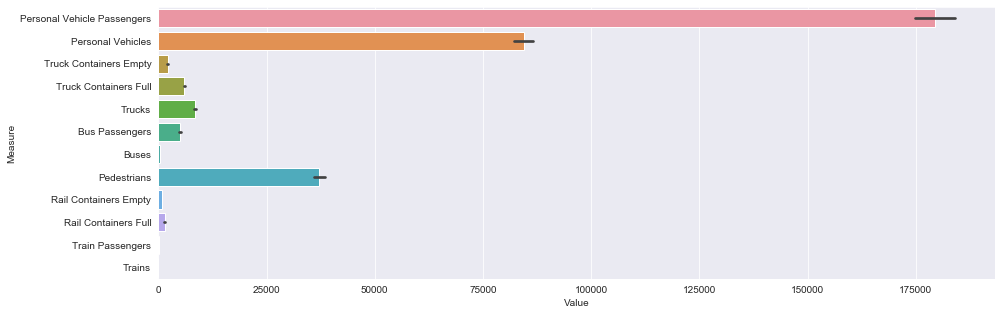

In [18]:
#Number of people entering the USA, mode of transportation
plt.figure(figsize=(15,5))
plt.grid()
transport = pd.pivot_table(data, index='Measure', values = 'Value', aggfunc = 'sum')
transport.sort_values(by = 'Value', ascending= False)
sns.barplot(x='Value',y='Measure',data=data)
sns.set(style="whitegrid")
#The 5 popular mode of transport used by incoming people are - Personal Vehicle Passengers, Personal Vehicle, Pedestrians, Truck, Truck Containers Full and Bus Passengers	

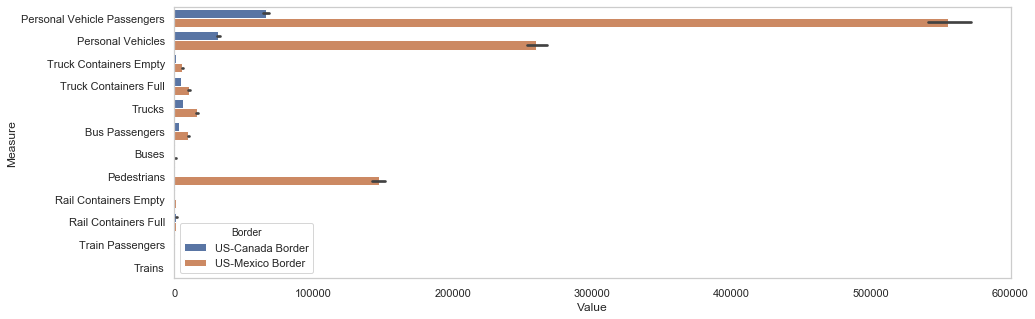

In [19]:
plt.figure(figsize=(15,5))
plt.grid()
sns.barplot(x='Value',y='Measure',data=data, hue= 'Border')
sns.set(style="whitegrid")

In [20]:
#Number of people entering the USA, year on year and mode of transportation
pd.pivot_table(data, index='Measure', columns='Year', values = 'Value', aggfunc = 'sum')

Year,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Measure,,,,,,,,,,,,,,,,,,,,,
Bus Passengers,5813778,6896919,7608484,7725590,8338859,7823231,8139017,7526855,7278897,7024637,...,5172532,5302245,5198900,5026677,4593284,4208709,3596769,3633900,3866441,568104
Buses,292789,389969,436803,469496,460056,457697,470321,475676,424729,409850,...,322256,320232,316352,317528,298515,266522,256078,241916,228070,32359
Pedestrians,34717351,44461186,45060023,48801064,47677158,52253906,51362762,49604705,48916697,46443432,...,40419815,41566510,41632603,41663089,41624490,42630748,43040837,46660171,49698880,7735191
Personal Vehicle Passengers,272593220,307001980,314295857,330891505,329841500,284076951,268007308,255834018,254206275,248568824,...,170153604,177057763,184472010,188925255,189659705,190514655,193769633,196352102,188066632,27564187
Personal Vehicles,101960373,119003203,120451297,126689655,129202573,123834970,122388232,118313556,121794376,121908002,...,92776037,95786139,99821057,101603429,102703661,102944904,103796944,103821051,99818351,15535529
Rail Containers Empty,268134,354288,513721,611927,684988,764043,774094,806863,835832,875489,...,1050626,1143295,1146628,1216132,1182975,1121598,1317410,1344704,1346364,209937
Rail Containers Full,472219,620145,1079074,1376950,1481674,1597954,1653204,1668857,1790382,1793627,...,1646715,1831655,1976600,2048714,2093053,2074216,2215954,2339494,2378114,379928
Train Passengers,224881,260610,258624,265341,287756,272547,270242,246897,236141,253591,...,280353,272367,283676,293791,295759,301650,295270,299753,294114,19167
Trains,38966,40541,38816,38949,40555,41046,40579,41911,41111,42265,...,35033,37481,38688,38500,40960,39925,33758,34936,34702,5505


In [21]:
#Number of people entering the USA, border and state wise
border= pd.pivot_table(data, index=['Border','State',], values = 'Value', aggfunc = 'sum')
border

Value
Border           State            
US-Canada Border AK       14676856
                 ID       21833390
                 ME      236781464
                 MI      775410321
                 MN       99126985
                 MT       56139436
                 ND       78600964
                 NY      854042599
                 OH            607
                 VT      118116868
                 WA      521397911
US-Mexico Border AZ      918287879
                 CA     2602572970
                 NM       68560332
                 TX     3747879529

In [22]:
#Number of people entering the USA, border, state and year wise
pd.pivot_table(data, index=['Border','State',], values = 'Value', columns= 'Year', aggfunc = 'sum')

Year                           1996         1997         1998         1999  \
Border           State                                                       
US-Canada Border AK        533846.0     549898.0     641446.0     594558.0   
                 ID        912301.0     917028.0     870206.0     919462.0   
                 ME      14625254.0   14362472.0   13697562.0   13226099.0   
                 MI      50694957.0   43840023.0   47720668.0   48570140.0   
                 MN       4489444.0    4232799.0    4541962.0    4716641.0   
                 MT       2546699.0    2604130.0    2563757.0    2853011.0   
                 ND       3055810.0    2804121.0    2833368.0    3170548.0   
                 NY      40711679.0   43111429.0   41888661.0   42784998.0   
                 OH             NaN          NaN          NaN          NaN   
                 VT       5747813.0    5432281.0    5150022.0    5630113.0   
                 WA      29721100.0   27658529.0   22384138.0   24031758.0   
US-Mexico Border AZ      38038999.0   40510361.0   41441325.0   44309727.0   
                 CA      53660517.0  114036240.0  122069944.0  127335362.0   
                 NM       1351546.0    1179333.0    1168300.0    2028146.0   
                 TX     183700386.0  192935554.0  201617045.0  218286161.0   

Year                           2000         2001         2002         2003  \
Border           State                                                       
US-Canada Border AK        597226.0     571401.0     572053.0     580050.0   
                 ID        905838.0     877294.0     796523.0     724604.0   
                 ME      13061076.0   11413326.0   10300604.0   10392682.0   
                 MI      51544853.0   40170653.0   35711575.0   32937524.0   
                 MN       4815548.0    4464157.0    4200452.0    4367642.0   
                 MT       2430641.0    2255343.0    2203512.0    2143149.0   
                 ND       3275535.0    3114535.0    3186595.0    3085606.0   
                 NY      43230558.0   41644418.0   43761727.0   37541832.0   
                 OH             NaN          NaN          NaN          NaN   
                 VT       5549330.0    5292160.0    5271269.0    4958570.0   
                 WA      22379068.0   20289104.0   16828385.0   16006755.0   
US-Mexico Border AZ      46455388.0   43736679.0   47879142.0   44387731.0   
                 CA     128130552.0  122897000.0  122893606.0  125512610.0   
                 NM       2314796.0    2185171.0    2791779.0    2613643.0   
                 TX     215331133.0  194172661.0  179305596.0  171140255.0   

Year                           2004         2005  ...         2011  \
Border           State                            ...                
US-Canada Border AK        604488.0     598815.0  ...     572395.0   
                 ID        708615.0     743955.0  ...    1042863.0   
                 ME      11527988.0   11586257.0  ...    8772871.0   
                 MI      32593006.0   32677938.0  ...   24949949.0   
                 MN       4593970.0    4401576.0  ...    3953171.0   
                 MT       2235952.0    2319660.0  ...    2298352.0   
                 ND       3183924.0    3184881.0  ...    3523890.0   
                 NY      37157536.0   36202136.0  ...   33003059.0   
                 OH             NaN          NaN  ...          NaN   
                 VT       4901303.0    4372332.0  ...    4668849.0   
                 WA      17188840.0   17156151.0  ...   23899512.0   
US-Mexico Border AZ      45409773.0   43389212.0  ...   28001652.0   
                 CA     122877609.0  121849249.0  ...   88164655.0   
                 NM       2525952.0    2836397.0  ...    2675937.0   
                 TX     172711342.0  168915709.0  ...  106698845.0   

Year                           2012         2013         2014         2015  \
Border           State                                                       

Applying SARIMA Model on the dataset

In [23]:
data = pd.pivot_table(data, values='Value', index='Date', aggfunc={'Value': np.sum})
data['Value'] # Grouped the value by month

Date
1996-01-01    32550342
1996-02-01    32212625
1996-03-01    35509073
1996-04-01    35690321
1996-05-01    37644486
                ...   
2019-10-01    31012145
2019-11-01    29581494
2019-12-01    31668228
2020-01-01    28928761
2020-02-01    27054958
Name: Value, Length: 290, dtype: int64

C:\Users\MEHUL\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


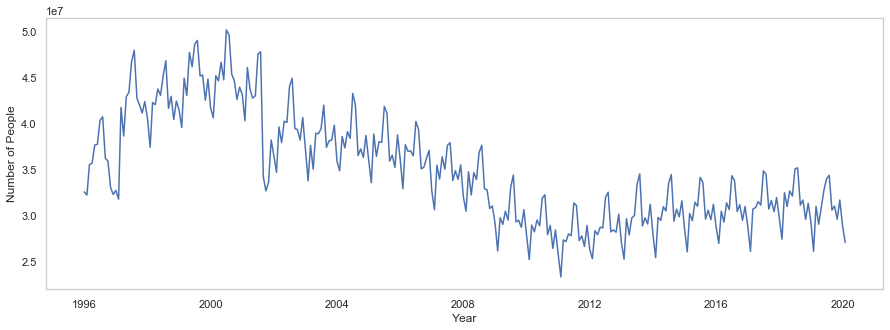

In [24]:
plt.figure(figsize=(15,5))
plt.grid()  
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.plot(data) # The plot shows that the data is not stationary and it follows some trend.

In [25]:
# Dividing the data into training and testing data
percent_training = 0.80 # We are taking 80 precent as training data
split_point = round(len(data) * percent_training)
training, testing = data[0:split_point], data[split_point:] 

In [26]:
training

,Value
Date,
1996-01-01,32550342
1996-02-01,32212625
1996-03-01,35509073
1996-04-01,35690321
1996-05-01,37644486
...,...
2014-12-01,31585034
2015-01-01,28580294
2015-02-01,26024213


In [27]:
training = np.log(training)
training_diff = training.diff(periods=1).values[1:] # Making the data stationary

In [28]:
training_diff

array([[-0.01042942],
       [ 0.09742978],
       [ 0.00509129],
       [ 0.05330696],
       [ 0.0023123 ],
       [ 0.0666752 ],
       [ 0.00976452],
       [-0.1179926 ],
       [-0.00782587],
       [-0.08458741],
       [-0.022106  ],
       [ 0.01349788],
       [-0.02955881],
       [ 0.27335805],
       [-0.07764147],
       [ 0.10519777],
       [ 0.01164383],
       [ 0.07279704],
       [ 0.02702225],
       [-0.11540926],
       [-0.01710586],
       [-0.02137448],
       [ 0.02998367],
       [-0.04424305],
       [-0.08066353],
       [ 0.12252121],
       [-0.00564498],
       [ 0.03987347],
       [-0.01584218],
       [ 0.04719098],
       [ 0.03654531],
       [-0.1173729 ],
       [ 0.03121767],
       [-0.06094069],
       [ 0.04864421],
       [-0.02252997],
       [-0.04797479],
       [ 0.12761671],
       [-0.04304518],
       [ 0.10351438],
       [-0.03299244],
       [ 0.05161759],
       [ 0.00849705],
       [-0.08202598],
       [ 0.00175721],
       [-0

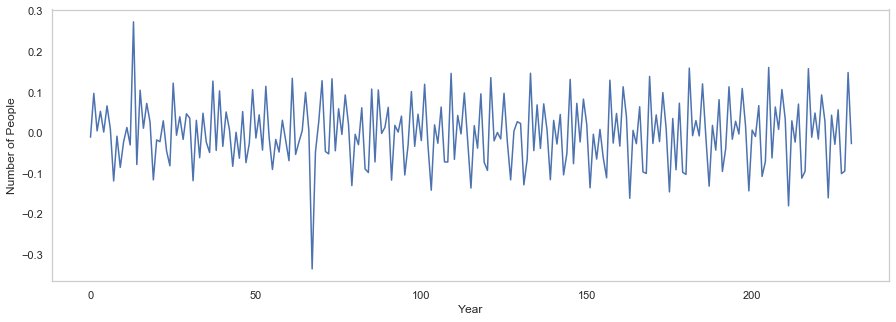

In [29]:
# Plotting training_diff to check if the data is stationary
plt.figure(figsize=(15,5))
plt.grid()  
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.plot(training_diff) # The data almost looks stationary

C:\Users\MEHUL\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
C:\Users\MEHUL\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\MEHUL\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_c

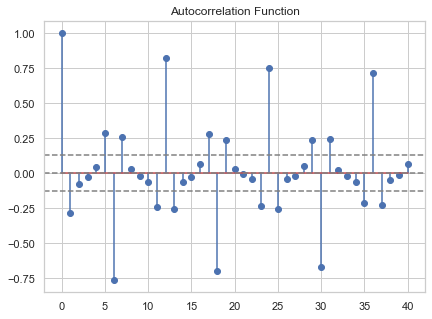

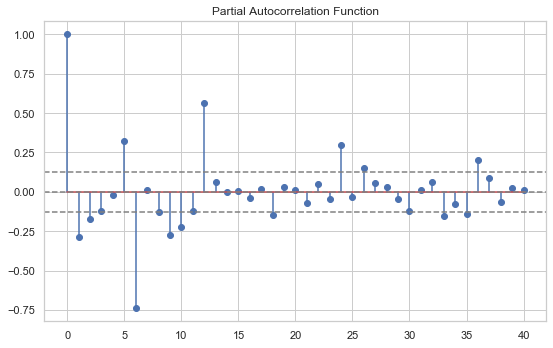

In [30]:
#import acf/pacf function
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(training_diff, nlags=40)
lag_pacf = pacf(training_diff, nlags=40, method='ols')

#Plot ACF:
plt.figure(figsize = (15,5))
plt.subplot(121) 
plt.stem(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(training)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(training)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.figure(figsize = (15,5))
plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(training)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(training)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


In [31]:
# Since, there was a trend in the data, therefore we are using SARIMA Model
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(endog=training,order=(4,1,4),seasonal_order=(1,0,0,12),enforce_invertibility=False,  enforce_stationarity= False)
model_fit= model.fit(disp= False)

C:\Users\MEHUL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\MEHUL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [32]:
# Predicting the output
k = len(testing)
forecast = model_fit.forecast(k)
forecast = np.exp(forecast)

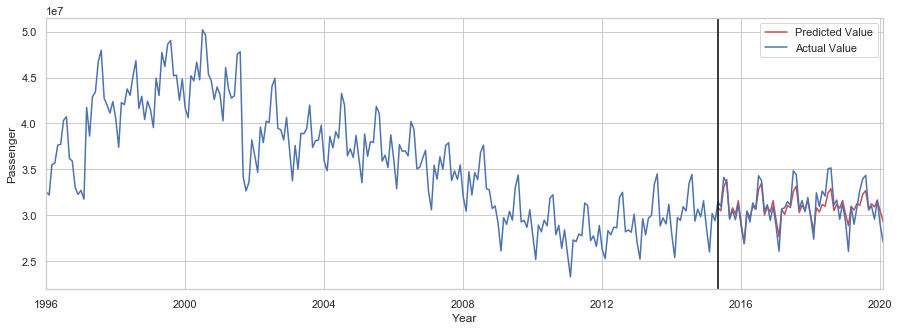

In [33]:
# Plotting actual and predicted value
plt.figure(figsize = (15,5))
plt.plot(forecast, color='r', label= 'Predicted Value') # The data looks quite accurate with SARIMA Model.
plt.plot(data, label= 'Actual Value')
plt.xlabel('Year')
plt.ylabel('Passenger')
plt.autoscale(enable=True, axis = 'x', tight= True)
plt.axvline(x= data.index[split_point], color= 'black')
plt.legend()

In [35]:
#Importing the dataset
data = pd.read_csv("C:\\Users\\MEHUL\\Downloads\\Border_Crossing_Entry_Data.csv\\Border_Crossing_Entry_Data.csv")
data.head()

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicle Passengers,1414
1,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicles,763
2,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Empty,412
3,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Full,122
4,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Trucks,545


In [36]:
#Splitting Year, Month, Date, Hour and Minute
data['Date']=pd.to_datetime(data['Date'])
data['Year']=data['Date'].dt.year
data['Month']=data['Date'].dt.month
data = data.sort_values(by = 'Date', ascending= False)
data = data.reset_index()
data= data.drop('index', axis=1)
data = data.pivot_table(values='Value',index='Date',columns='State',aggfunc='sum')
data


State,AK,AZ,CA,ID,ME,MI,MN,MT,ND,NM,NY,OH,TX,VT,WA
Date,,,,,,,,,,,,,,,
1996-01-01,7705.0,3377293.0,5150784.0,49170.0,1074729.0,3601808.0,249370.0,153585.0,127474.0,96099.0,2188691.0,NaN,14433342.0,162030.0,1878262.0
1996-02-01,7585.0,3107925.0,4815986.0,46009.0,1028579.0,3591481.0,251552.0,142295.0,191354.0,94889.0,2277216.0,NaN,14222175.0,317261.0,2118318.0
1996-03-01,12710.0,3440829.0,5217457.0,66688.0,1140686.0,3790656.0,326829.0,141689.0,236279.0,108166.0,2383109.0,NaN,15947568.0,408746.0,2287661.0
1996-04-01,19454.0,3284338.0,4825534.0,78561.0,1107516.0,4011962.0,328233.0,172486.0,229763.0,113716.0,2986910.0,NaN,15695343.0,390153.0,2446352.0
1996-05-01,48239.0,3303278.0,4896714.0,84131.0,1251218.0,4173137.0,395999.0,186065.0,264054.0,113593.0,3618191.0,NaN,16023946.0,493722.0,2792199.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-01,17579.0,2757199.0,9637341.0,63343.0,503995.0,1981130.0,282159.0,159534.0,237542.0,292112.0,2433765.0,NaN,10592080.0,353526.0,1700840.0
2019-11-01,8197.0,2764365.0,9287234.0,57733.0,433966.0,1826198.0,256301.0,124812.0,228636.0,295584.0,2049305.0,NaN,10470426.0,242867.0,1535870.0
2019-12-01,7874.0,2885028.0,9878356.0,57757.0,433258.0,1847538.0,265101.0,144248.0,231240.0,353796.0,2119775.0,NaN,11492913.0,260166.0,1691178.0


In [37]:
#defining function so that the same function can be called for state wise
def SARIMAMODEL(data):
    plt.figure(figsize=(15,5))
    plt.grid()  
    plt.xlabel('Year')
    plt.ylabel('Number of People')
    plt.plot(data) # The plot shows that the data is not stationary and it follows some trend.
    
    # Dividing the data into training and testing data
    percent_training = 0.80 # We are taking 80 precent as training data
    split_point = round(len(data) * percent_training)
    training, testing = data[0:split_point], data[split_point:] 
    
    training = np.log(training)
    training_diff = training.diff(periods=1).values[1:] # Making the data stationary
    
    # Plotting training_diff to check if the data is stationary
    plt.figure(figsize=(15,5))
    plt.grid()  
    plt.xlabel('Year')
    plt.ylabel('Number of People')
    plt.plot(training_diff) # The data almost looks stationary
    
    #import acf/pacf function
    from statsmodels.tsa.stattools import acf, pacf

    lag_acf = acf(training_diff, nlags=40)
    lag_pacf = pacf(training_diff, nlags=40, method='ols')

    #Plot ACF:
    plt.figure(figsize = (15,5))
    plt.subplot(121) 
    plt.stem(lag_acf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(training)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(training)),linestyle='--',color='gray')
    plt.title('Autocorrelation Function')

    #Plot PACF:
    plt.figure(figsize = (15,5))
    plt.subplot(122)
    plt.stem(lag_pacf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(training)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(training)),linestyle='--',color='gray')
    plt.title('Partial Autocorrelation Function')
    plt.tight_layout()

    # Since, there was a trend in the data, therefore we are using SARIMA Model
    import statsmodels.api as sm
    model = sm.tsa.statespace.SARIMAX(endog=training,order=(4,1,4),seasonal_order=(1,0,0,12),enforce_invertibility=False,  enforce_stationarity= False)
    model_fit= model.fit(disp= False)

    # Predicting the output
    k = len(testing)
    forecast = model_fit.forecast(k)
    forecast = np.exp(forecast)

    # Plotting actual and predicted value
    plt.figure(figsize = (15,5))
    plt.plot(forecast, color='r', label= 'Predicted Value') # The data looks quite accurate with SARIMA Model.
    plt.plot(data, label= 'Actual Value')
    plt.xlabel('Year')
    plt.ylabel('Passenger')
    plt.autoscale(enable=True, axis = 'x', tight= True)
    plt.axvline(x= data.index[split_point], color= 'black')
    plt.legend()

C:\Users\MEHUL\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
C:\Users\MEHUL\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
C:\Users\MEHUL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\MEHUL\Anaconda3\lib\site-packages\statsmodels\base\model.py

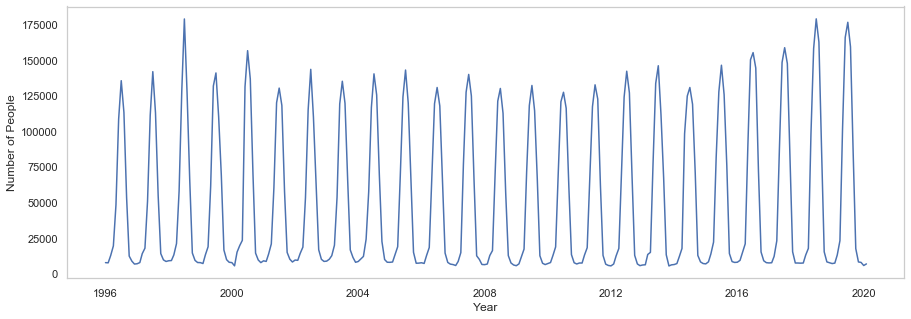

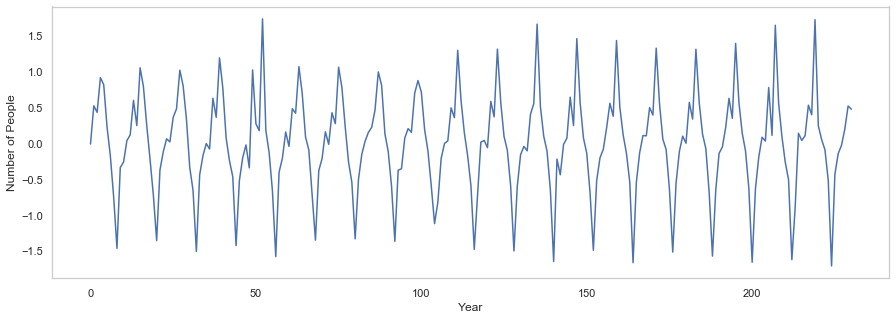

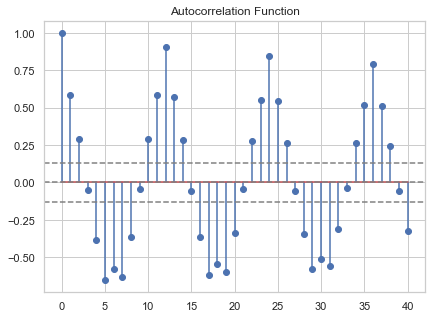

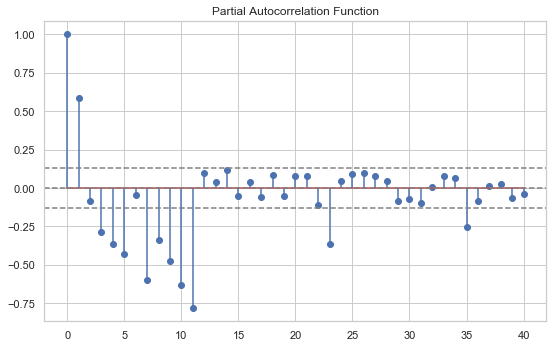

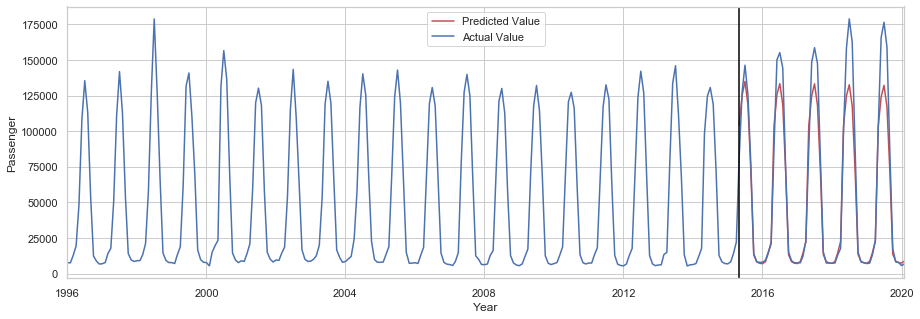

In [38]:
#Checking State Wise
data['AK']
SARIMAMODEL (data['AK'])